# 1. Importing and Installing Essential Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Extracting Key Points with Mediapipe's Holistic Model

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

#3. Testing Algorithm: Camera Preview for Verification

In [6]:
output_directory = 'D:\dataset'  # Note the double backslashes to escape the backslash
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Iterate through all items in the output directory
    for item in os.listdir(output_directory):
        # Get the full path of the item
        item_path = os.path.join(output_directory, item)
        
        # Check if it's a directory
        if os.path.isdir(item_path):
            # Iterate through all files in the directory
            for filename in os.listdir(item_path):
                # Get the full path of the file
                file_path = os.path.join(item_path, filename)

                # Check if it's a file
                if os.path.isfile(file_path):
                    # Read feed
                    frame = cv2.imread(file_path)

                    # Check if the frame was successfully read
                    if frame is not None:
                        # Make detections
                        image, results = mediapipe_detection(frame, holistic)
                        print(results)

                        # Draw landmarks
                        draw_landmarks(image, results)

                        # Show to screen
                        # cv2.imshow('OpenCV Feed', image)

                        # Wait for a key press
                        cv2.waitKey(0)

    # Close all windows
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

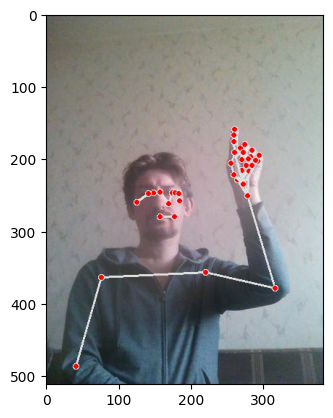

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3.Extracting Key Point Values

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
len(results.pose_landmarks.landmark)

33

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.44067487,  0.51285589, -1.042449  , ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('Result', result_test)

In [18]:
np.load('Result.npy')

array([ 0.44067487,  0.51285589, -1.042449  , ...,  0.        ,
        0.        ,  0.        ])

# 4. Optimizing Organization: Establishing Folders for Efficient Collection Management

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('dataset') 

# Actions that we try to detect
actions = np.array(['dislike','four','one'])


In [20]:
for action in actions: 
        try: 
            os.makedirs(os.path.join(DATA_PATH, action))
        except:
            pass

# 5.Aggregating Keypoint Data for Training and Evaluation

In [21]:
# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic

# Update the output directory path
output_directory = r'D:\dataset'

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Create action folder if it doesn't exist
        action_folder = os.path.join(output_directory, action)
        os.makedirs(action_folder, exist_ok=True)
        
        # Loop through folders in the output directory
        for folder_name in os.listdir(output_directory):
            folder_path = os.path.join(output_directory, folder_name)
            output = os.path.join(DATA_PATH, folder_name)
            # Check if the item is a directory
            if os.path.isdir(folder_path):
                counter = 0
                # Loop through files in the folder
                for frame_file in os.listdir(folder_path):
                    frame_path = os.path.join(folder_path, frame_file)
                    
                    # Check if the file is an image
                    if frame_file.endswith(('.jpg', '.jpeg', '.png')):
                        # Read image
                        frame = cv2.imread(frame_path)
                        
                        # Ensure that the frame is not None (i.e., image reading is successful)
                        if frame is not None:
                            # Make detections using MediaPipe Holistic
                            image, results = mediapipe_detection(frame, holistic)
                            
                            # Draw landmarks
                            draw_styled_landmarks(image, results)
                            
                            # Export keypoints
                            keypoints = extract_keypoints(results)
                            
                            # Save keypoints as .npy file in the action folder
                            npy_filename = f"{counter}.npy"
                            npy_filename = os.path.splitext(frame_file)[0] + '.npy'
                            npy_path = os.path.join(output, npy_filename)
                            np.save(npy_path, keypoints)
                            counter+=1
                        else:
                            print(f"Failed to read image: {frame_path}")

print("Conversion completed successfully!")


Conversion completed successfully!


In [22]:

cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'dislike': 0, 'four': 1, 'one': 2}

In [26]:
import re

sequences, labels = [], []
for action in actions:
    for sequence_file in os.listdir(os.path.join(DATA_PATH, action)):
        # Use regular expression to extract numeric part of the file name
        match = re.match(r'(\d+)', sequence_file)
        if match:
            sequence_number = int(match.group(1))  # Extract the numeric part
            window = []
            res = np.load(os.path.join(DATA_PATH, action, sequence_file))
            window.append(res)
            sequences.append(window)
            labels.append(label_map[action])


In [27]:
sequences

[[array([0.49936363, 0.68430829, 0.04802604, ..., 0.        , 0.        ,
         0.        ])],
 [array([ 0.50254703,  0.48440957, -0.36530051, ...,  0.        ,
          0.        ,  0.        ])],
 [array([ 0.53242755,  0.61947948, -0.27788883, ...,  0.        ,
          0.        ,  0.        ])],
 [array([ 0.36890388,  0.56977516, -0.54504341, ...,  0.        ,
          0.        ,  0.        ])],
 [array([ 0.4695777 ,  0.27110031, -0.21674924, ...,  0.        ,
          0.        ,  0.        ])],
 [array([ 0.37550536,  0.41280288, -0.47157228, ...,  0.492677  ,
          0.84960306, -0.00406305])],
 [array([-0.05969425,  0.85156935, -0.7692678 , ...,  0.        ,
          0.        ,  0.        ])],
 [array([ 0.37640619,  0.57808638, -0.76763582, ...,  0.        ,
          0.        ,  0.        ])],
 [array([ 0.46749744,  0.38548708, -0.73966169, ...,  0.35875121,
          0.45617837, -0.02146646])],
 [array([ 0.40091527,  0.3928237 , -0.42843109, ...,  0.        ,
    

In [28]:
np.array(sequences).shape

(3361, 1, 1662)

In [29]:
np.array(labels).shape

(3361,)

In [30]:
X = np.array(sequences)

In [31]:
X

array([[[ 0.49936363,  0.68430829,  0.04802604, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.50254703,  0.48440957, -0.36530051, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.53242755,  0.61947948, -0.27788883, ...,  0.        ,
          0.        ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.53587651,  0.3543056 , -0.40303639, ...,  0.2728104 ,
          0.43522108, -0.01754158]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])

In [32]:
X.shape

(3361, 1, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
X_train.shape

(3192, 1, 1662)

In [37]:
len(X_test)

169

In [38]:
len(X_train)

3192

# 7. Developing and Training a GRU and Dense Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(GRU (64, return_sequences=True, activation='relu', input_shape=(1,1662)))
model.add(GRU (128, return_sequences=True, activation='relu'))
model.add(GRU (64, return_sequences=False, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

d:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
actions.shape[0]

3

In [43]:
res = [0.7,0.2,0.1]

In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
actions[np.argmax(res[0])]

'dislike'

In [46]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - categorical_accuracy: 0.3326 - loss: 1.0999
Epoch 2/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.3453 - loss: 1.0978
Epoch 3/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.3395 - loss: 1.0961
Epoch 4/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.4003 - loss: 1.0672
Epoch 5/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.4573 - loss: 0.9773
Epoch 6/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.4912 - loss: 0.9189
Epoch 7/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.5048 - loss: 0.9189
Epoch 8/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.5196 - loss: 0.8754
Epoch 9/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.5367 - loss: 0.8315
Epoch 10/1000
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.5373 - loss: 0.801

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 64)          │       331,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 128)         │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,827 (5.29 MB)

 Trainable params: 462,275 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 924,552 (3.53 MB)

# 8. Make Predictions

In [48]:
res = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step


In [49]:
actions[np.argmax(res[2])]

'four'

In [50]:
actions[np.argmax(y_test)]

'four'

# 9. Save Weights

In [51]:
model.save('action.h5')

In [52]:
model.load_weights('action.h5')

# 10. Enhancing Model Assessment: Leveraging Confusion Matrix for Enhanced Accuracy Evaluation

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [54]:
yhat = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [55]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 98,  15],
        [  2,  54]],

       [[ 95,  10],
        [ 18,  46]],

       [[111,   9],
        [ 14,  35]]], dtype=int64)

In [57]:
accuracy_score(ytrue, yhat)

0.7988165680473372

# 11. Real-Time Testing: Sign Language Detection Application

In [58]:
from scipy import stats

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [89]:
# 1. New detection variables

sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
            #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti